In [262]:
# Kevin Roa
# kar180005
# CS 4375.005
# Homework 6

In [263]:
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from kneed import KneeLocator


In [264]:
iris = datasets.load_iris()

In [265]:
def sse():
  # Get SSE value for each k 1 to 30
  SSE = []
  for k in range(1, 31):
    kmeans = k_mean(k)
    SSE.append(kmeans.inertia_)

  # Calculate K based on SSE curve
  kl = KneeLocator(range(1, 31), SSE, curve="convex", direction="decreasing")
  K = kl.elbow

  # Plot the SSE curve
  plt.title("Sum of Squared Error")
  plt.plot(range(1, 31), SSE)
  plt.xlabel("K")
  plt.ylabel("SSE")

  # Plot a line at x = K
  kLine = plt.axvline(x=K)
  kLine.set_linestyle('--')
  kLine.set_label("K = {}".format(K))

  print("SSE Curve :")
  plt.legend()
  plt.show()

  return K

In [266]:
def k_mean(k):
  # Perform k-mean on the data
  kmeans = KMeans(init="random", n_clusters=k)
  kmeans.fit(iris.data)

  return kmeans

In [267]:
def h_cluster(k):
  agglo = AgglomerativeClustering(n_clusters=k)
  agglo.fit_predict(iris.data)

  return agglo

In [268]:
def g_mix(k):
  gmm = GaussianMixture(n_components=k)
  gmm.fit(iris.data)

  return gmm.predict(iris.data)

In [269]:
def generatePlot(data, labels, title):
  X = data[:, :2]
  y = labels

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

  plt.figure(2, figsize=(8, 6))
  plt.clf()
  plt.title(title)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
  plt.xlabel("Sepal length")
  plt.ylabel("Sepal width")

  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())

  print("\n", title, ":")
  plt.show()

SSE Curve :


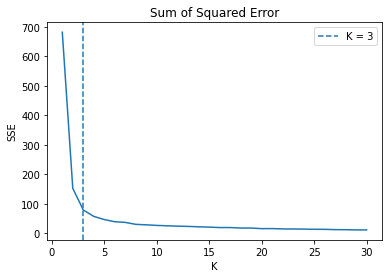


 Original Clustering :


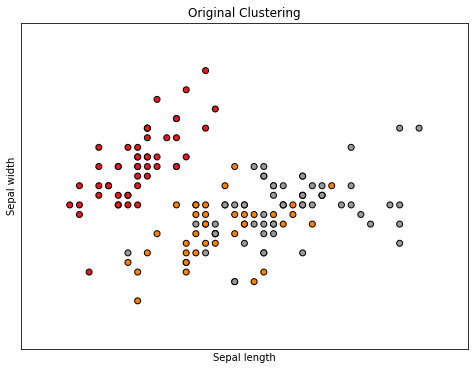


 K-Means Clustering :


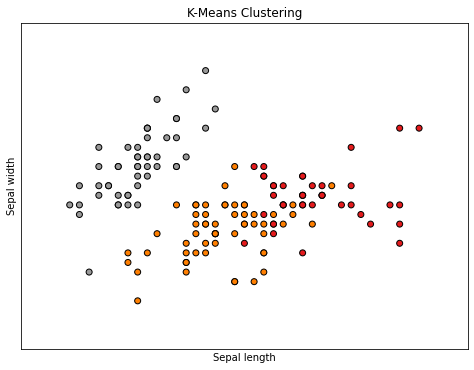


 Hierarchical Clustering :


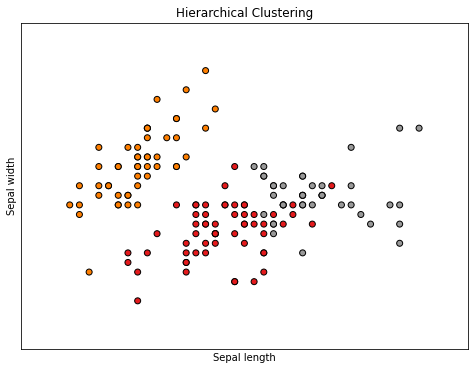


 Gaussian Mixture Model :


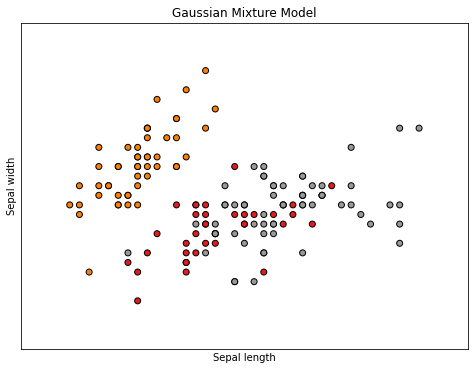

In [270]:
def run():
  k = sse()

  generatePlot(iris.data, iris.target, "Original Clustering")

  kmeans = k_mean(k)
  generatePlot(iris.data, kmeans.labels_, "K-Means Clustering")

  agglo = h_cluster(k)
  generatePlot(iris.data, agglo.labels_, "Hierarchical Clustering")

  gmm = g_mix(k)
  generatePlot(iris.data, gmm, "Gaussian Mixture Model")

run()